In [1]:
import pyspark.sql
import pandas as pd

### Total number of records (per wiki)

In [2]:
query = """SELECT wiki AS Wiki, COUNT(*) as `Number of Records`
        FROM gmodena.imagerec_prod
        GROUP BY wiki"""
total_number_of_records = spark.sql(query).toPandas()

In [3]:
total_number_of_records

,Wiki,Number of Records
0,arwiki,143860


### Population statistics

In [4]:
total_number_of_records['Number of Records'].describe()

count         1.0
mean     143860.0
std           NaN
min      143860.0
25%      143860.0
50%      143860.0
75%      143860.0
max      143860.0
Name: Number of Records, dtype: float64

In [5]:
total_number_of_records['Number of Records'].median()

143860.0

In [6]:
total_number_of_records['Number of Records'].mode()

0    143860
dtype: int64

### Total number of images per page

In [7]:
query = """SELECT wiki AS Wiki, page_id as `Page ID`, COUNT(*) as `Number of Images`
        FROM gmodena.imagerec_prod
        GROUP BY wiki, page_id"""
total_number_of_images_per_page = spark.sql(query).toPandas()

In [8]:
total_number_of_images_per_page

,Wiki,Page ID,Number of Images
0,arwiki,5530076,2
1,arwiki,5667896,2
2,arwiki,6501019,3
3,arwiki,2775347,3
4,arwiki,5398284,3
5,arwiki,7797694,3
6,arwiki,7809844,3
7,arwiki,1954544,1
8,arwiki,7229013,3
9,arwiki,525174,3


#### Breakdown of the number of images being suggested for each page

Keep in mind that pages without an image suggestion will apear as 1.

In [9]:
query = """SELECT number_of_images AS `Image Suggestions`, count(*) AS `Pages`
        FROM (
        SELECT wiki, page_id, COUNT(*) as number_of_images
        FROM gmodena.imagerec_prod
        GROUP BY wiki, page_id
        ) AS expr_qry 
        GROUP BY number_of_images
        ORDER BY number_of_images"""
breakdown_of_image_sug_per_page = spark.sql(query).toPandas()

In [10]:
breakdown_of_image_sug_per_page.set_index('Image Suggestions', inplace=True)
breakdown_of_image_sug_per_page

,Pages
Image Suggestions,
1,68463
2,9437
3,18837
6,2


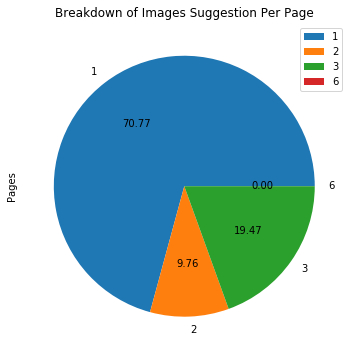

In [16]:
breakdown_of_image_sug_per_page.plot.pie(y='Pages',
                                         title='Breakdown of Images Suggestion Per Page',
                                         autopct="%.2f",
                                         figsize=(6, 6));

Breakdown of image suggestion data by confidence rating.
A rating of None indicates that the page had no image suggestion

In [12]:
query = """SELECT wiki AS Wiki, confidence_rating AS `Confidence Rating`, COUNT(*) AS `Image Suggestions`
        FROM gmodena.imagerec_prod
        GROUP BY wiki, confidence_rating
        ORDER BY `Image Suggestions`"""
breakdown_of_image_sug_by_confidence_score = spark.sql(query).toPandas()

In [13]:
breakdown_of_image_sug_by_confidence_score

,Wiki,Confidence Rating,Image Suggestions
0,arwiki,low,6440
1,arwiki,high,19407
2,arwiki,None,39518
3,arwiki,medium,78495


#### Get articles with more than 3 image suggestions

Assuming no error this table should be empty

In [14]:
query = """WITH large_image_sug AS 
        (SELECT wiki, page_id, COUNT(*)
        FROM gmodena.imagerec_prod
        GROUP BY wiki, page_id
        HAVING COUNT(*) > 3)
        SELECT p.* 
        FROM gmodena.imagerec_prod p
        JOIN large_image_sug
        ON large_image_sug.wiki = p.wiki
        AND large_image_sug.page_id = p.page_id
        ORDER BY p.wiki, p.page_id, p.image_id"""
articles_with_more_image_sug = spark.sql(query).toPandas()

In [15]:
articles_with_more_image_sug

,wiki,page_id,page_title,image_id,confidence_rating,source,dataset_id,insertion_ts
0,arwiki,1914121,إيقاع_(موسيقى),3-4.png,medium,wikipedia,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
1,arwiki,1914121,إيقاع_(موسيقى),8beat example 01.jpg,low,wikidata,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
2,arwiki,1914121,إيقاع_(موسيقى),8beat example 01.jpg,low,wikidata,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
3,arwiki,1914121,إيقاع_(موسيقى),8beat_example_01.jpg,medium,wikipedia,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
4,arwiki,1914121,إيقاع_(موسيقى),Phenakistoscope_3g07690b.gif,medium,wikipedia,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
5,arwiki,1914121,إيقاع_(موسيقى),Phenakistoscope_3g07690b.gif,medium,wikipedia,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
6,arwiki,437433,إيقاع,3-4.png,medium,wikipedia,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
7,arwiki,437433,إيقاع,8beat example 01.jpg,low,wikidata,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
8,arwiki,437433,إيقاع,8beat example 01.jpg,low,wikidata,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
9,arwiki,437433,إيقاع,8beat_example_01.jpg,medium,wikipedia,b66b499b-ffac-4204-bb2d-4e4e8e6451d0,1.613561e+09
